# Simulate Normal Distribution from Sample
Using Julia, fit a data sample to a normal distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000.

## 0. Import packages and define SimulateNormalDistributionFromSample function
Install (if necessary) and import the functions necessary to run the SimulateNormalDistributionFromSample function. Then define the function for later use. 

In [54]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
theme(:bright)

function SimulateNormalDistributionFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    Param_NormalDistSim = fit(Normal, DF_RandomNumbers[:, "x1"])
    println("Mean (μ) used in simulation: ", Param_NormalDistSim.μ)
    println("Standard deviation (σ) used in simulation: ", Param_NormalDistSim.σ)
    # Conduct simulation
    Arr_NormalDistSim = rand(Param_NormalDistSim, trials, 1)
    DF_NormalDistSim = DataFrame(Arr_NormalDistSim, :auto)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(DF_RandomNumbers[:, column_name])
    kde_simulation = kde(DF_NormalDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Normal Distribution: " * column_name
        p = histogram(DF_NormalDistSim[:, "x1"], bins=:scott, fillalpha = 0.4, label="Simulated Outcomes", title=title_for_plot, xlabel=column_name)
        plot!(kde_sample.x, kde_sample.density .* length(DF_NormalDistSim[:, "x1"]) .* 0.5, linewidth = 3, color = 2, label="Density of Sample")
        plot!(kde_simulation.x, kde_simulation.density .* length(DF_NormalDistSim[:, "x1"]) .* 0.5, linewidth = 3, color = 1, label="Density of Simulation")
        display(p)
    end
    # Return simulation results
    return DF_NormalDistSim
end

SimulateNormalDistributionFromSample (generic function with 3 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [14]:
Arr_RandomNumbers = rand(1:10, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

,x1
,Int64
1,8
2,2
3,2
4,9
5,4
6,2
7,9
8,3
9,6


## 2. Use the SimulateNormalDistributionFromSample function
Use the SimulateNormalDistributionFromSample function to simulate a Normal distribution from your sample dataset.

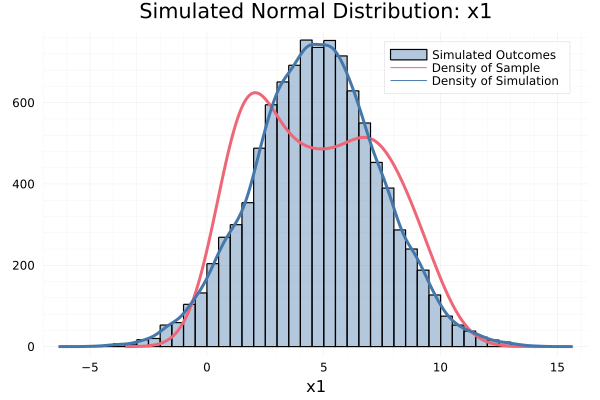

Mean (μ) used in simulation: 4.66
Standard deviation (σ) used in simulation: 2.7026653510932497


,x1
,Float64
1,10.6043
2,0.631924
3,7.45143
4,4.95438
5,4.17526
6,4.67652
7,3.7746
8,-1.52122
9,5.59833


In [55]:
DF_Sim = SimulateNormalDistributionFromSample(DF_RandomNumbers, "x1")